### CitiBike Usage Analysis

#### Period:
##### The data for this analysis was obtained from the CitiBike System Data portal.
## Add Hypothesis
#### Gender (Zero=unknown; 1=male; 2=female)

#### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline

In [2]:
zip_file = zipfile.ZipFile('201806-citibike-tripdata.csv.zip')
zip_file.extractall()
zip_file.open('201806-citibike-tripdata.csv')
df = pd.read_csv('201806-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,569,2018-06-01 01:57:20.5140,2018-06-01 02:06:50.0880,72,W 52 St & 11 Ave,40.767272,-73.993929,173,Broadway & W 49 St,40.760683,-73.984527,21481,Subscriber,1999,1
1,480,2018-06-01 02:02:42.3980,2018-06-01 02:10:43.3540,72,W 52 St & 11 Ave,40.767272,-73.993929,477,W 41 St & 8 Ave,40.756405,-73.990026,19123,Subscriber,1988,1
2,692,2018-06-01 02:04:23.6240,2018-06-01 02:15:55.7470,72,W 52 St & 11 Ave,40.767272,-73.993929,457,Broadway & W 58 St,40.766953,-73.981693,26983,Subscriber,1986,1
3,664,2018-06-01 03:00:55.4610,2018-06-01 03:11:59.9060,72,W 52 St & 11 Ave,40.767272,-73.993929,379,W 31 St & 7 Ave,40.749156,-73.991600,26742,Subscriber,1973,1
4,818,2018-06-01 06:04:54.4270,2018-06-01 06:18:32.6170,72,W 52 St & 11 Ave,40.767272,-73.993929,459,W 20 St & 11 Ave,40.746745,-74.007756,26386,Subscriber,1984,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953103 entries, 0 to 1953102
Data columns (total 15 columns):
tripduration               int64
starttime                  object
stoptime                   object
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 int64
gender                     int64
dtypes: float64(4), int64(6), object(5)
memory usage: 223.5+ MB


In [4]:
df.shape

(1953103, 15)

In [5]:
list(df.columns)

['tripduration',
 'starttime',
 'stoptime',
 'start station id',
 'start station name',
 'start station latitude',
 'start station longitude',
 'end station id',
 'end station name',
 'end station latitude',
 'end station longitude',
 'bikeid',
 'usertype',
 'birth year',
 'gender']

In [6]:
# Gender breakdown

df['gender'].value_counts()

1    1281908
2     469544
0     201651
Name: gender, dtype: int64

In [7]:
# User type info

df['usertype'].unique()

array(['Subscriber', 'Customer'], dtype=object)

In [8]:
# Drop all rows where gneder value = 0 (unknown)

df.drop(df[df['gender'] == 0].index, inplace=True)

In [9]:
len(df.index)

1751452

In [10]:
# Reasign gender values to 1 = Male and 2 = Female

df['gender'].replace({1:'Male', 2:'Female'}, inplace=True)

In [11]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,569,2018-06-01 01:57:20.5140,2018-06-01 02:06:50.0880,72,W 52 St & 11 Ave,40.767272,-73.993929,173,Broadway & W 49 St,40.760683,-73.984527,21481,Subscriber,1999,Male
1,480,2018-06-01 02:02:42.3980,2018-06-01 02:10:43.3540,72,W 52 St & 11 Ave,40.767272,-73.993929,477,W 41 St & 8 Ave,40.756405,-73.990026,19123,Subscriber,1988,Male
2,692,2018-06-01 02:04:23.6240,2018-06-01 02:15:55.7470,72,W 52 St & 11 Ave,40.767272,-73.993929,457,Broadway & W 58 St,40.766953,-73.981693,26983,Subscriber,1986,Male
3,664,2018-06-01 03:00:55.4610,2018-06-01 03:11:59.9060,72,W 52 St & 11 Ave,40.767272,-73.993929,379,W 31 St & 7 Ave,40.749156,-73.991600,26742,Subscriber,1973,Male
4,818,2018-06-01 06:04:54.4270,2018-06-01 06:18:32.6170,72,W 52 St & 11 Ave,40.767272,-73.993929,459,W 20 St & 11 Ave,40.746745,-74.007756,26386,Subscriber,1984,Male


In [12]:
df['starttime'] = pd.to_datetime(df['starttime'])

In [13]:
df.index = df['starttime']
trips_per_day = df.starttime.resample('D', how = ['count'])

C:\Users\ogi.andjelov\RovaLab\env\rovalab_live\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  


Text(0, 0.5, 'Number of trips')

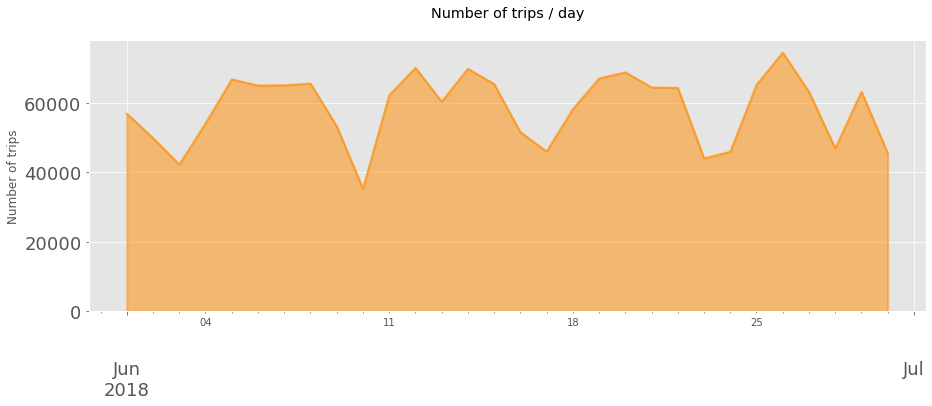

In [14]:
trips_per_day.plot(kind = 'area', stacked = False, figsize = (15, 5),
                  color = 'darkorange', linewidth = 2, legend = False)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.title('Number of trips / day\n')
plt.xlabel('')
plt.ylabel('Number of trips')

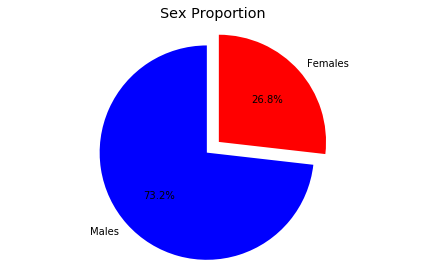

In [15]:
# sum the instances of males and females
males = (df['gender'] == 'Male').sum()
females = (df['gender'] == 'Female').sum()

# put them into a list called proportions
proportions = [males, females]

# Create a pie chart
plt.pie(
    # using proportions
    proportions,
    
    # with the labels being officer names
    labels = ['Males', 'Females'],
    
    # with no shadows
    shadow = False,
    
    # with colors
    colors = ['blue','red'],
    
    # with one slide exploded out
    explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Sex Proportion")

# View the plot
plt.tight_layout()
plt.show()

In [16]:
# Create a new column - user_age

df['user_age'] = df.apply(lambda x: 2020 - x['birth year'], axis=1)

In [17]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,user_age
starttime,,,,,,,,,,,,,,,,
2018-06-01 01:57:20.514,569,2018-06-01 01:57:20.514,2018-06-01 02:06:50.0880,72,W 52 St & 11 Ave,40.767272,-73.993929,173,Broadway & W 49 St,40.760683,-73.984527,21481,Subscriber,1999,Male,21
2018-06-01 02:02:42.398,480,2018-06-01 02:02:42.398,2018-06-01 02:10:43.3540,72,W 52 St & 11 Ave,40.767272,-73.993929,477,W 41 St & 8 Ave,40.756405,-73.990026,19123,Subscriber,1988,Male,32
2018-06-01 02:04:23.624,692,2018-06-01 02:04:23.624,2018-06-01 02:15:55.7470,72,W 52 St & 11 Ave,40.767272,-73.993929,457,Broadway & W 58 St,40.766953,-73.981693,26983,Subscriber,1986,Male,34
2018-06-01 03:00:55.461,664,2018-06-01 03:00:55.461,2018-06-01 03:11:59.9060,72,W 52 St & 11 Ave,40.767272,-73.993929,379,W 31 St & 7 Ave,40.749156,-73.991600,26742,Subscriber,1973,Male,47
2018-06-01 06:04:54.427,818,2018-06-01 06:04:54.427,2018-06-01 06:18:32.6170,72,W 52 St & 11 Ave,40.767272,-73.993929,459,W 20 St & 11 Ave,40.746745,-74.007756,26386,Subscriber,1984,Male,36


In [18]:
# Drop unnecessary columns

df.drop(df.iloc[:, 1:12], inplace=True, axis=1)
df.head()

,tripduration,usertype,birth year,gender,user_age
starttime,,,,,
2018-06-01 01:57:20.514,569,Subscriber,1999,Male,21
2018-06-01 02:02:42.398,480,Subscriber,1988,Male,32
2018-06-01 02:04:23.624,692,Subscriber,1986,Male,34
2018-06-01 03:00:55.461,664,Subscriber,1973,Male,47
2018-06-01 06:04:54.427,818,Subscriber,1984,Male,36


In [19]:
# Lookup gender age distirbution

df.groupby('gender').agg({"user_age": [np.min, np.max]})

user_age     
           amin amax
gender              
Female       18  134
Male         18  134

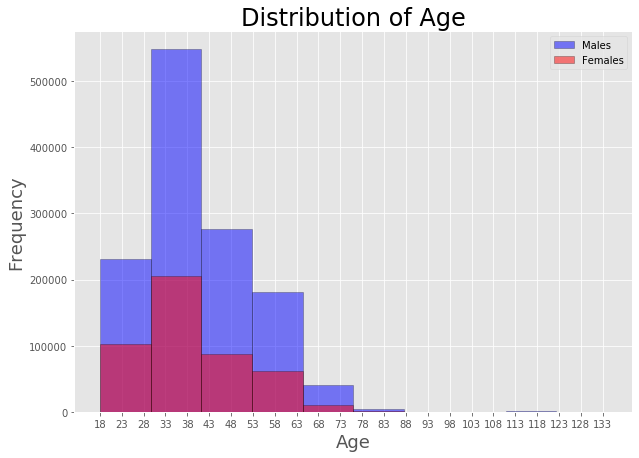

In [32]:
df[df['gender'] == 'Male']['user_age'].plot(kind='hist',color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['gender'] == 'Female']['user_age'].plot(kind='hist', color='red', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.xticks(np.arange(min(df['user_age']), max(df['user_age'])+1, 5.0))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Age', size=24)
plt.xlabel('Age', size=18)
plt.ylabel('Frequency', size=18);

In [37]:
ranges = np.arange(10, 99, 5)

df_male = df.query("gender == 'Male'")

In [38]:
df_male.head()

,tripduration,usertype,birth year,gender,user_age
starttime,,,,,
2018-06-01 01:57:20.514,569,Subscriber,1999,Male,21
2018-06-01 02:02:42.398,480,Subscriber,1988,Male,32
2018-06-01 02:04:23.624,692,Subscriber,1986,Male,34
2018-06-01 03:00:55.461,664,Subscriber,1973,Male,47
2018-06-01 06:04:54.427,818,Subscriber,1984,Male,36


Text(0.5, 1.0, 'Male Age Distribution')

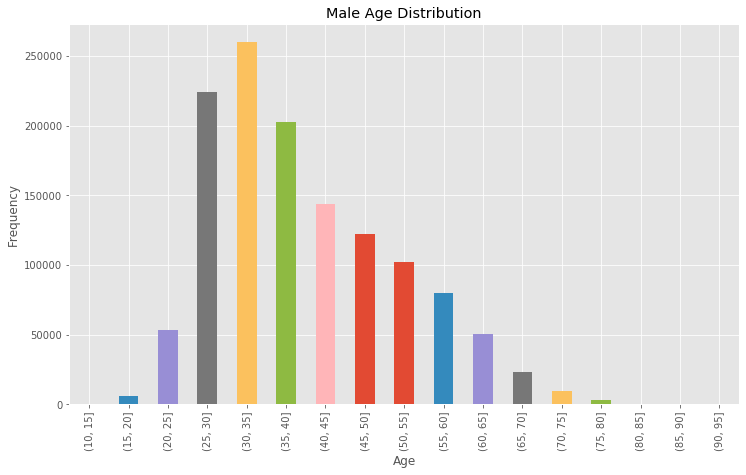

In [39]:
df_male.groupby(pd.cut(df_male['user_age'], ranges))['user_age'].count().plot(kind="bar", figsize=(12,7))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Male Age Distribution")

Text(0.5, 1.0, 'Female Age Distribution')

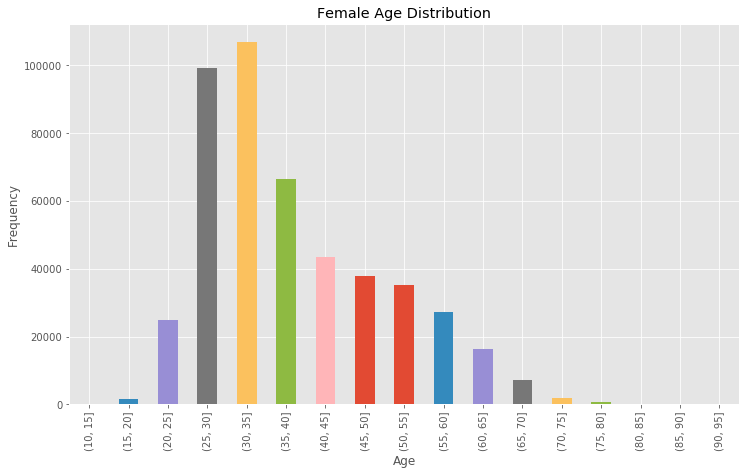

In [40]:
df_female = df.query("gender == 'Female'")
df_female.groupby(pd.cut(df_female['user_age'], ranges))['user_age'].count().plot(kind="bar", figsize=(12,7))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Female Age Distribution")

### Empirical Cumulative Distribution Function (ECDF)

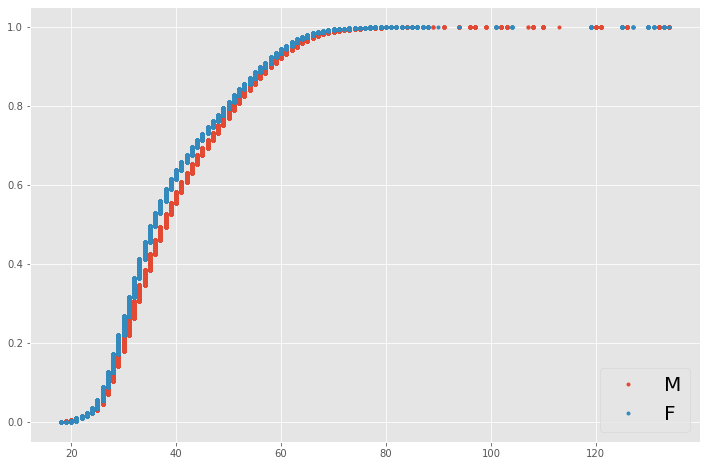

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))
xm = np.sort(df_male['user_age'])
ym = np.arange(1, len(xm)+1) / len(xm)
_=plt.plot(xm, ym, marker='.', linestyle='none', label='M')
xf = np.sort(df_female['user_age'])
yf= np.arange(1, len(xf)+1) / len(xf)
_=plt.plot(xf, yf, marker='.', linestyle='none', label='F')
plt.margins(0.05) # Keeps data off plot edges
plt.legend(loc=4, fontsize=20)
plt.show()

### Relationship analysis between two variables - age of male and female CitiBike users

In [23]:
ageF = df_female['user_age'].sort_values()
ageM = df_male['user_age'].sample(n=len(ageF.index)).sort_values()

In [26]:
scipy.stats.spearmanr(ageM, ageF)

SpearmanrResult(correlation=0.9990918181180288, pvalue=0.0)

In [27]:
pearson = scipy.stats.pearsonr(ageM, ageF)
print (pearson)

(0.9961927642695196, 0.0)
